In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [2]:
# Load the data from a CSV file into a DataFrame and display 5 rows
df = pd.read_csv('Hitters.csv')
df.head(3)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A


In [3]:
df.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [4]:
# Remove "Unnamed: 0" from the dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:
# creating dummies for all the variable of object type
dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])
# Convert boolean True/False to integer 1/0
dummies = dummies.astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     322 non-null    int32
 1   League_N     322 non-null    int32
 2   Division_E   322 non-null    int32
 3   Division_W   322 non-null    int32
 4   NewLeague_A  322 non-null    int32
 5   NewLeague_N  322 non-null    int32
dtypes: int32(6)
memory usage: 7.7 KB


In [8]:
# create label X and y
y = df['Salary']

# drop the column with the outcome variable (Salary), and categorical columns for which dummy variables is already created:
X_numerical = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

#list of all numerical columns in X_numericals
list_numerical = X_numerical.columns
list_numerical

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

In [9]:
# Create X with dummy variables and numerical variables
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  League_N     322 non-null    int32  
 17  Division_W   322 non-null    int32  
 18  NewLeague_N  322 non-null    int32  
dtypes: float

In [10]:
# Split the dataset into training and testing sets before handling missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Perform Standardization on numerical features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [12]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
168,-0.397522,-0.564851,-0.670974,-1.052955,-0.393382,-1.060741,-0.684910,-0.924502,-0.910332,-0.729716,-0.936501,-0.847742,-0.856822,-0.210356,-0.654364,-0.777869,0,1,0
148,0.780435,0.791703,-0.437296,0.306138,-0.355490,-0.584603,0.768478,0.560523,0.571824,-0.332183,0.302385,0.145025,-0.052093,0.071044,1.831723,0.315685,0,0,0
221,1.291745,1.459214,-0.320458,1.509906,0.061319,0.891425,-0.684910,-0.763020,-0.718487,-0.577718,-0.653843,-0.733311,-0.664141,0.147789,-0.676829,0.003241,1,0,1
227,1.265856,1.136225,0.847928,2.131206,0.061319,1.272336,-1.100164,-0.695302,-0.692186,-0.378952,-0.545591,-0.708569,-0.581023,0.147789,-0.669341,-0.777869,0,1,0
139,0.398569,0.081127,-1.021489,0.577957,-0.582840,1.558019,-1.100164,-0.928843,-0.918067,-0.776484,-0.849298,-0.891040,-0.694365,-0.031284,-0.714270,0.159463,0,1,1


In [13]:
# Imputing the values NA values in the series with the median
median_salary = y_train.median(skipna=True)
y_train = y_train.fillna(median_salary)
y_test = y_test.fillna(median_salary)

In [14]:
# Create and fit the Lasso regression model to the training data
lasso_model = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)
print("Lasso intercept:", lasso_model.intercept_)

# Get the coefficients (weights) of the fitted Lasso regression model
print("Lasso coefficients:", lasso_model.coef_)

Lasso intercept: 552.1437963555319
Lasso coefficients: [-310.80528552  264.55074813   24.16085059    0.           -0.
   98.27501652  -71.92938903 -154.88026267  115.47642309    0.
  274.32490369  222.99944567 -217.31294449   50.42773172   41.83950725
  -22.76889619   23.87540404 -118.63107582   -0.        ]


In [15]:
# Training data
pred_train = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")

# Test data
pred_test = lasso_model.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

MSE training set 84531.03
R squared training set 47.15
---------------------------
MSE test set 116175.54
R squared test set 38.36


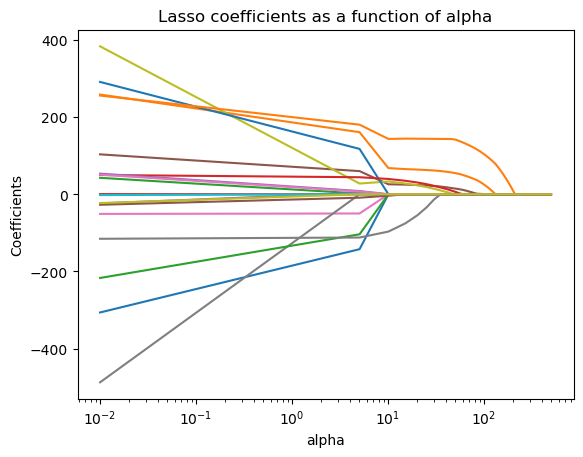

In [16]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [17]:
# Create and fit the LassoCV model to the training data with cross-validation
# Lasso with 10 fold cross-validation
lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv =10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)

In [18]:
# Get the best alpha (regularization strength) selected by cross-validation
lasso_cv_model.alpha_

1

In [19]:
# Create and fit the Lasso regression model using the best alpha found by cross-validation
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

In [20]:
# Training data
pred_train_tuned = lasso_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train_tuned)
print('MSE training set post tuning', round(mse_train, 2))
print('R squared training set post tuning', round(r2_score(y_train, pred_train_tuned)*100,2))
print("---------------------------")

# Test data
pred_test_tuned = lasso_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test_tuned)
print('MSE test set post tuning', round(mse_test, 2))
print('R squared test set post tuning', round(r2_score(y_test, pred_test_tuned)*100,2))

MSE training set post tuning 84531.03
R squared training set post tuning 47.15
---------------------------
MSE test set post tuning 116175.54
R squared test set post tuning 38.36


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Create and fit the Ridge regression model to the training data
ridge_model = Ridge(alpha=1).fit(X_train, y_train)
ridge_model.intercept_

552.2287554333542

In [23]:
# Training data
pred_train = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")
# Test data
pred_test = ridge_model.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

MSE training set 84369.79
R squared training set 47.25
---------------------------
MSE test set 116730.89
R squared test set 38.06


In [24]:
# Get the coefficients (weights) of the fitted Ridge regression model
ridge_model.coef_

array([-299.44680072,  247.15463531,   26.09749437,    8.12950685,
         -4.59947678,   98.24018695,  -73.56921813, -208.11549116,
        220.72992894,   24.79168215,  231.91705884,  188.99248475,
       -212.18547418,   51.11247316,   46.6903119 ,  -27.64614616,
         43.01303452, -120.28167205,  -17.53721078])

In [25]:
ridge_cv_model = RidgeCV(alphas= np.random.randint(0, 1000, 100), cv=10).fit(X_train, y_train)

# Get the best alpha (regularization strength) selected by cross-validation
ridge_cv_model.alpha_

207

In [26]:
# Create and fit the ridge regression model using the best alpha found by cross-validation
ridge_tuned = Ridge(alpha=ridge_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

In [27]:
# Training data
pred_train_tuned = ridge_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train_tuned)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train_tuned)*100,2))
print("---------------------------")

# Test data
pred_test_tuned = ridge_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test_tuned)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test_tuned)*100,2))

MSE training set 103129.0
R squared training set 35.52
---------------------------
MSE test set 117580.85
R squared test set 37.61


In [28]:
# Create a Pandas Series of the coefficients from the tuned Ridge regression model
pd.Series(ridge_tuned.coef_, index=X_train.columns)

AtBat           4.815868
Hits           26.643603
HmRun           6.755859
Runs           18.089285
RBI            22.307715
Walks          21.633914
Years           4.671443
CAtBat         21.624457
CHits          32.375619
CHmRun         28.237797
CRuns          29.829153
CRBI           34.608333
CWalks          6.290841
PutOuts        28.540223
Assists         4.093941
Errors         -6.197103
League_N        8.708542
Division_W    -30.357636
NewLeague_N     4.281054
dtype: float64

In [29]:
# Import the necessary classes from scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
# Import the necessary classes from scikit-learn
from sklearn.model_selection import GridSearchCV

# Create a repeated K-fold cross-validator
cv = RepeatedKFold(n_splits =10, n_repeats =3, random_state =1)

# Define the grid of hyperparameters to search
grid = dict()
grid['alpha'] = np.arange(0,2,0.1)
# Create an instance of the Ridge regression model


In [30]:
grid

{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}

In [31]:
model = Ridge()

In [32]:
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error',cv = cv, n_jobs= -1)

In [33]:
results = search.fit(X_train, y_train)

In [69]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -238.285
Config: {'alpha': 0.9}


In [72]:
# Create and fit the Ridge regression model to the training data with the optimal alpha
ridge_model_after_gridcv = Ridge(alpha = results.best_params_.get('alpha')).fit(X_train, y_train)
y_pred_after_gridcv = ridge_model_after_gridcv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_after_gridcv))

341.87636396607616

In [74]:
# Get the r2 score
r2_score(y_test,y_pred_after_gridcv)

0.3798224478702289

In [76]:
# Create a Pandas Series of the coefficients from the fitted Ridge regression model
pd.Series(ridge_model_after_gridcv.coef_, index = X_train.columns)

AtBat         -301.940590
Hits           250.000657
HmRun           27.368934
Runs             7.101426
RBI             -6.000930
Walks           99.030120
Years          -72.603088
CAtBat        -221.067417
CHits          225.900021
CHmRun          22.855480
CRuns          237.607797
CRBI           193.577140
CWalks        -213.804271
PutOuts         51.080832
Assists         47.120753
Errors         -27.541072
League_N        43.413579
Division_W    -120.095472
NewLeague_N    -17.822759
dtype: float64